## Summary

The Exploratory Data Analysis (EDA) is an approach to analyze data sets to summarize their main characteristics and make multiple graphics to visualize the features or the relationships among features inside the data set.

For this project, given the data set which combines the information of the experiment, the demographic features of patients, and the total scores as well as subscores of the five questionnaires, some target questions are worth exploring by ourselves:

- What is the distribution of patients' age in our studies?
- Is it normally distributed?
- What is the gender ratio in our studies?
- Is there any relationship between gender (M, F) and the five total scores?
- Is there any relationship between hearing status (HL, NH) and the five total scores?
- Is there any relationship between age and the five total scores?
- Distribution of scores of each questionnaire. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset/updated_combined_dataset.csv', skiprows=1)

In [3]:
new_columns = ['Study', 'Location', 'Hearing status', 'Age', 'Gender', 'THI_Total(100)',
       'THI_F', 'THI_E', 'THI_C', 'TPFQ_Total(100)', 'TPFQ_C', 'TPFQ_E', 'TPFQ_H',
       'TPFQ_S', 'TFI_Total(100)', 'TFI_I', 'TFI_SC', 'TFI_C', 'TFI_SL', 'TFI_A',
       'TFI_R', 'TFI_Q', 'TFI_E', 'BAI_Total(63)', 'BDI_Total(63)']

In [4]:
data.columns = new_columns

In [5]:
data.head()

,Study,Location,Hearing status,Age,Gender,THI_Total(100),THI_F,THI_E,THI_C,TPFQ_Total(100),...,TFI_I,TFI_SC,TFI_C,TFI_SL,TFI_A,TFI_R,TFI_Q,TFI_E,BAI_Total(63),BDI_Total(63)
0,A,UIUC,HL,52.0,F,84.0,91.67,87.50,60.0,89.70,...,95.0,90.00,75.00,86.67,88.33,75.0,65.0,83.33,16.0,18.0
1,A,UIUC,HL,60.0,F,8.0,0.00,0.00,40.0,5.05,...,40.0,30.00,10.00,10.00,3.33,0.0,0.0,0.00,0.0,1.0
2,A,UIUC,NH,40.0,M,6.0,4.17,0.00,20.0,1.60,...,10.0,30.00,0.00,0.00,10.00,0.0,0.0,0.00,0.0,1.0
3,A,UIUC,HL,47.0,M,18.0,20.83,12.50,20.0,31.25,...,70.0,66.67,16.67,10.00,23.33,40.0,10.0,3.33,1.0,0.0
4,A,UIUC,HL,45.0,M,12.0,8.33,6.25,30.0,10.00,...,20.0,16.67,3.33,3.33,0.00,20.0,0.0,3.33,0.0,1.0


In [6]:
data.isnull().sum()

Study              0
Location           0
Hearing status     1
Age                2
Gender             2
THI_Total(100)     0
THI_F              0
THI_E              0
THI_C              0
TPFQ_Total(100)    0
TPFQ_C             0
TPFQ_E             0
TPFQ_H             0
TPFQ_S             0
TFI_Total(100)     0
TFI_I              3
TFI_SC             3
TFI_C              3
TFI_SL             3
TFI_A              3
TFI_R              3
TFI_Q              3
TFI_E              3
BAI_Total(63)      0
BDI_Total(63)      0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.head()

,Study,Location,Hearing status,Age,Gender,THI_Total(100),THI_F,THI_E,THI_C,TPFQ_Total(100),...,TFI_I,TFI_SC,TFI_C,TFI_SL,TFI_A,TFI_R,TFI_Q,TFI_E,BAI_Total(63),BDI_Total(63)
0,A,UIUC,HL,52.0,F,84.0,91.67,87.50,60.0,89.70,...,95.0,90.00,75.00,86.67,88.33,75.0,65.0,83.33,16.0,18.0
1,A,UIUC,HL,60.0,F,8.0,0.00,0.00,40.0,5.05,...,40.0,30.00,10.00,10.00,3.33,0.0,0.0,0.00,0.0,1.0
2,A,UIUC,NH,40.0,M,6.0,4.17,0.00,20.0,1.60,...,10.0,30.00,0.00,0.00,10.00,0.0,0.0,0.00,0.0,1.0
3,A,UIUC,HL,47.0,M,18.0,20.83,12.50,20.0,31.25,...,70.0,66.67,16.67,10.00,23.33,40.0,10.0,3.33,1.0,0.0
4,A,UIUC,HL,45.0,M,12.0,8.33,6.25,30.0,10.00,...,20.0,16.67,3.33,3.33,0.00,20.0,0.0,3.33,0.0,1.0


In [9]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

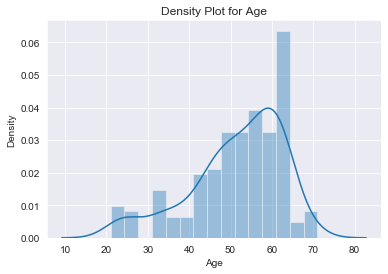

In [10]:
# Age
sns.set_style('darkgrid')
sns.distplot(data.Age, bins=15)
plt.title("Density Plot for Age")
plt.show()

In [11]:
# check for normality
from scipy import stats
x = data.Age.values
print("Null hypothesis: our data follows a normal distribution.")
shapiro_test = stats.shapiro(x) # shapiro test
k,p = shapiro_test
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  
    print("The null hypothesis is rejected, our data is not normally distributed!")
else:
    print("The null hypothesis cannot be rejected, our data is normally distributed!")

Null hypothesis: our data follows a normal distribution.
p = 3.45337e-08
The null hypothesis is rejected, our data is not normally distributed!


<b>Interpretation:</b> Based on the density plot and the hypothesis testing, the ages of all the patients in our studies do not follow a normal distribution. To be specific, the age distribution is kind of left-skewed, indicating that most of our patients are around 50 to 64 years old.

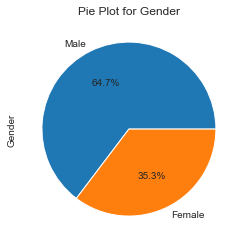

In [12]:
# Sex
gender = data.Gender.replace({'F':'Female', 'M':'Male'})
gender_count = gender.value_counts()
gender_count.plot.pie(autopct="%.1f%%")
plt.title("Pie Plot for Gender")
plt.show()

<b>Interpretation:</b> Based on the pie plot, around 2/3 of our patients are male, and 1/3 are female. If the patients are tested at random, there might be a trend that tinnitus tends to be more popular among males. 

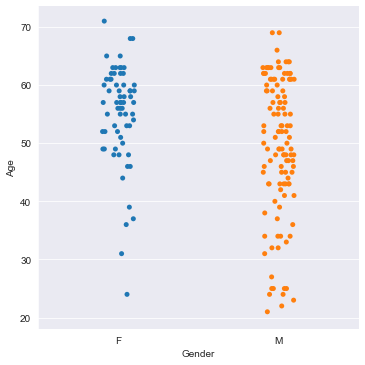

In [13]:
sns.catplot(x="Gender", y="Age", data=data)
plt.show()

<b>Interpretation:</b> Based on the categorical plot, the age distributions of males and females are quite different. For females, the majority lies in the range between 50 and 70. For males, the ages are more evenly distributed. 

In [14]:
total_score_list = ['THI_Total(100)','TPFQ_Total(100)','TFI_Total(100)','BAI_Total(63)','BDI_Total(63)']

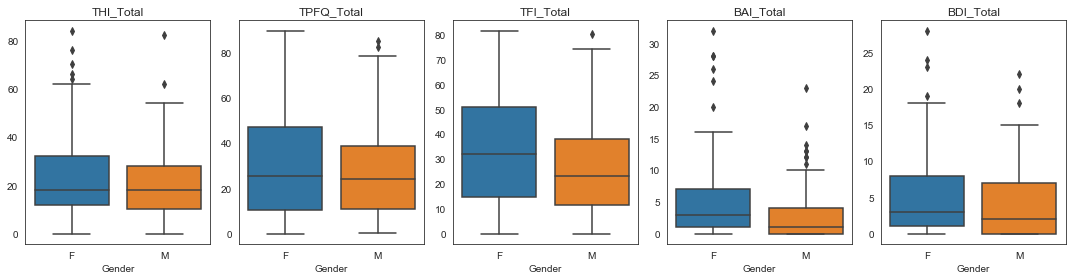

In [15]:
# Gender VS Total Scores
f = plt.figure(figsize=(15, 4))
gs = f.add_gridspec(1,5)
for i in range(0,5):
    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, i])
        sns.boxplot(x = data.Gender, y=data[total_score_list[i]])
        plt.xlabel('Gender')
        plt.ylabel('')
        plt.title(total_score_list[i].split('(')[0])
f.tight_layout()

<b>Interpretation:</b> The above five plots show the relationships between the five total scores and gender. There is a slight difference in gender which is that female tend to have higher total scores compared to male. 

In [16]:
# We will only consider HL and NH
hearing_data = data[(data['Hearing status'] == 'HL') | (data['Hearing status'] == 'NH')]
hearing_data.shape

(160, 25)

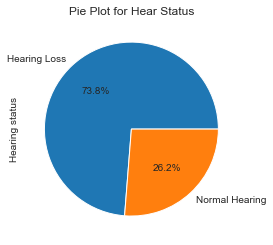

In [17]:
hear_status = hearing_data['Hearing status'].replace({'HL':'Hearing Loss', 'NH':'Normal Hearing'})
hs_count = hear_status.value_counts()
hs_count.plot.pie(autopct="%.1f%%")
plt.title("Pie Plot for Hear Status")
plt.show()

<b>Interpretation:</b> Based on the pie plot, around 3/4 of our patients have hearing loss and 1/4 have normal hearing. The result makes sense and people have hearing loss are more likely to suffer from tinnitus. 

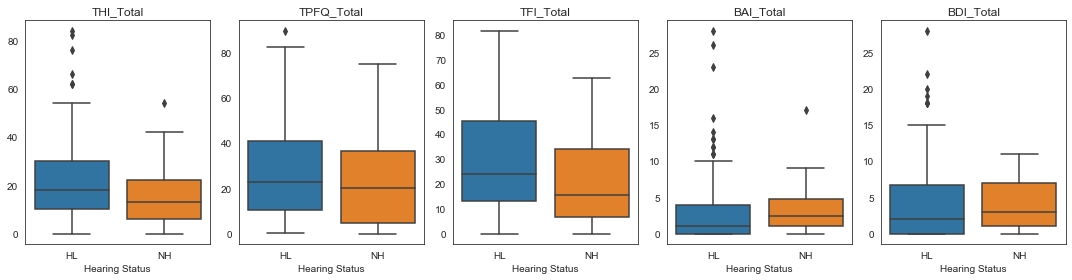

In [18]:
# HS VS Total Scores
f = plt.figure(figsize=(15, 4))
gs = f.add_gridspec(1,5)
for i in range(0,5):
    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, i])
        sns.boxplot(x = hearing_data['Hearing status'], y=hearing_data[total_score_list[i]])
        plt.xlabel('Hearing Status')
        plt.ylabel('')
        plt.title(total_score_list[i].split('(')[0])
f.tight_layout()

<b>Interpretation:</b> We create the boxplot for the five total scores of the two hearing status. People who suffer from hearing loss have higher scores for the three tinnitus-related questionnaires. For the scores of emotion-related questionnaires, people with normal hearing tend to have higher scores.

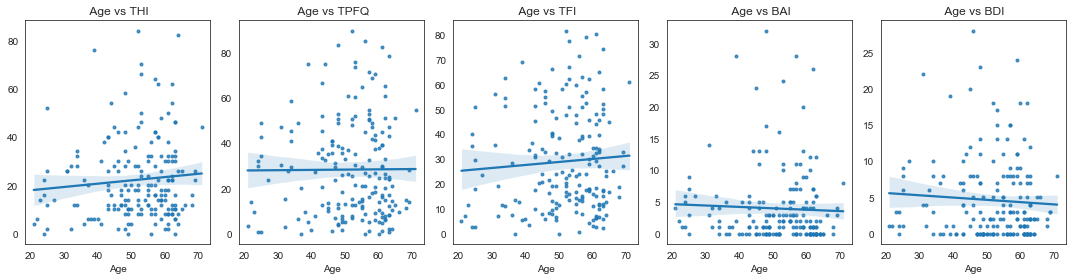

In [19]:
# Age VS Total Score
f = plt.figure(figsize=(15, 4))
gs = f.add_gridspec(1,5)
for i in range(0,5):
    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, i])
        sns.regplot(x = 'Age', y = total_score_list[i], data = data, marker='.')
        plt.xlabel('Age')
        plt.ylabel('')
        plt.title(f" Age vs {total_score_list[i].split('_')[0]}")

f.tight_layout()

<b>Interpretation:</b> The above five plots show the relationships between the five total scores and age. The regression lines are almost horizontal, indicating that the relationships are very week. 

# New: Frequency by Response

In [20]:
thi = pd.read_csv('dataset/separate/THI.csv')
tfi = pd.read_csv('dataset/separate/TFI.csv')
tpfq = pd.read_csv('dataset/separate/TPFQ.csv')

In [21]:
print(f"The shape of THI is {thi.shape}")
print(f"The shape of TFI is {tfi.shape}")
print(f"The shape of TPFQ is {tpfq.shape}")

The shape of THI is (199, 25)
The shape of TFI is (185, 25)
The shape of TPFQ is (196, 20)


## For THI

Scale: 0, 2, 4

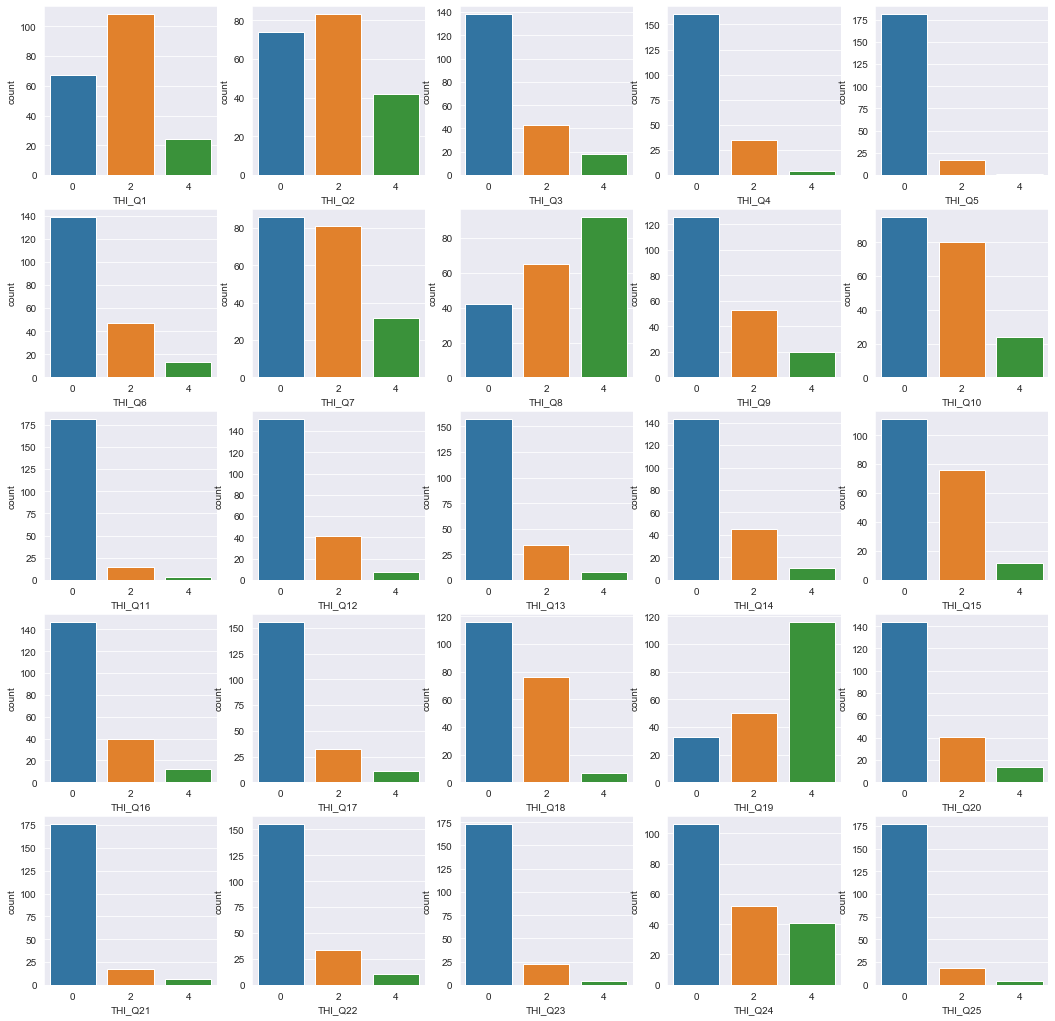

In [22]:
fig, ax = plt.subplots(5,5,figsize=(18,18))

num_columns = thi.shape[1]

for row in range(0,5):
    for col in range(0,5):
        cur_feature = thi.columns[5*row+col]
        sns.countplot(thi[cur_feature].astype(int), ax=ax[row][col])

In [23]:
# group by subscore (3 subscales)

thi_f_idx = [1,1,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0]
thi_e_idx = [0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1]
thi_c_idx = [0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0]

thi_f = thi.loc[:,[i==1 for i in thi_f_idx]]
thi_e = thi.loc[:,[i==1 for i in thi_e_idx]]
thi_c = thi.loc[:,[i==1 for i in thi_c_idx]]

In [24]:
thi_f_val = thi_f.values.reshape(-1)
thi_e_val = thi_e.values.reshape(-1)
thi_c_val = thi_c.values.reshape(-1)

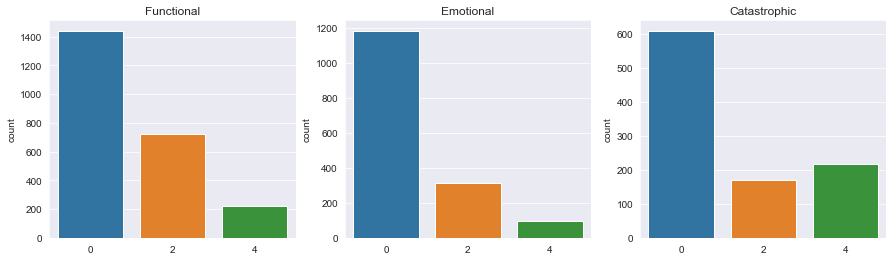

In [25]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.countplot(thi_f_val.astype(int), ax=ax1)
sns.countplot(thi_e_val.astype(int), ax=ax2)
sns.countplot(thi_c_val.astype(int), ax=ax3)
ax1.title.set_text('Functional')
ax2.title.set_text('Emotional')
ax3.title.set_text('Catastrophic')
plt.show()

## For TFI

Scale: 0-10

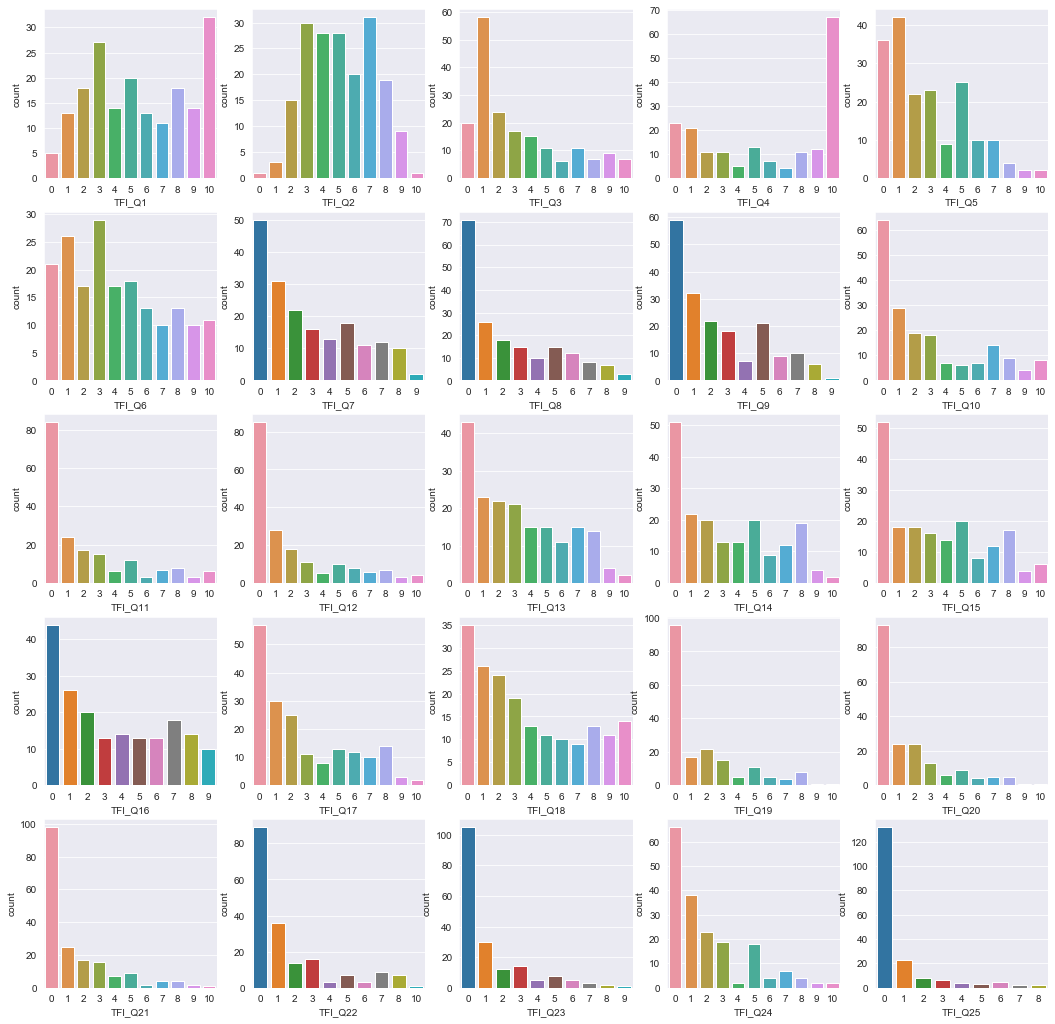

In [26]:
fig, ax = plt.subplots(5,5,figsize=(18,18))

num_columns = tfi.shape[1]

for row in range(0,5):
    for col in range(0,5):
        cur_feature = tfi.columns[5*row+col]
        sns.countplot(tfi[cur_feature].astype(int), ax=ax[row][col])

In [27]:
# group by subscore (8 subscales)

tfi_i = tfi.iloc[:,0:3]
tfi_sc = tfi.iloc[:,3:6]
tfi_c = tfi.iloc[:,6:9]
tfi_sl = tfi.iloc[:,9:12]
tfi_a = tfi.iloc[:,12:15]
tfi_r = tfi.iloc[:,15:18]
tfi_q = tfi.iloc[:,18:22]
tfi_e = tfi.iloc[:,22:]

In [28]:
tfi_i_val = tfi_i.values.reshape(-1)
tfi_sc_val = tfi_sc.values.reshape(-1)
tfi_c_val = tfi_c.values.reshape(-1)
tfi_sl_val = tfi_sl.values.reshape(-1)
tfi_a_val = tfi_a.values.reshape(-1)
tfi_r_val = tfi_r.values.reshape(-1)
tfi_q_val = tfi_q.values.reshape(-1)
tfi_e_val = tfi_e.values.reshape(-1)

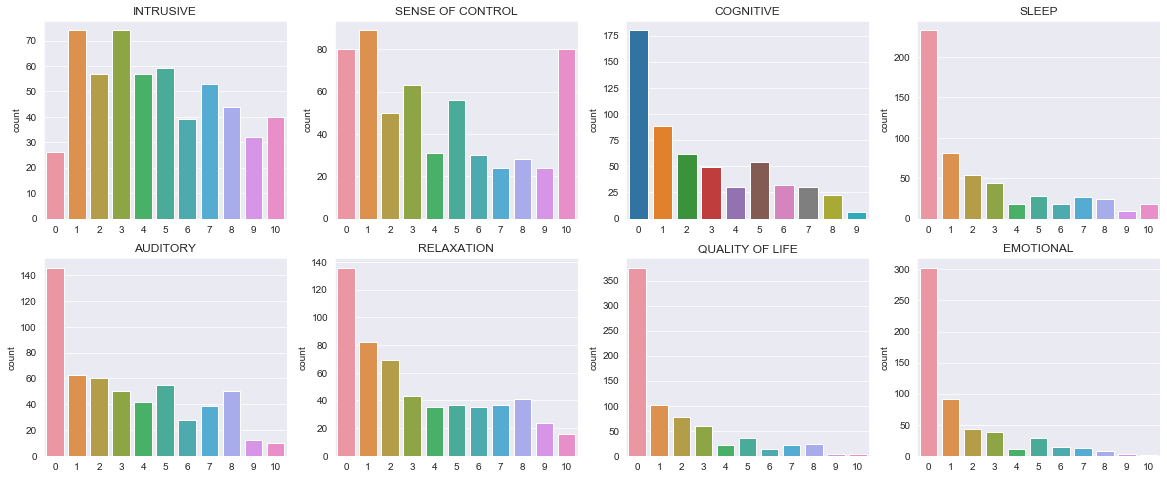

In [29]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(244)
ax5 = fig.add_subplot(245)
ax6 = fig.add_subplot(246)
ax7 = fig.add_subplot(247)
ax8 = fig.add_subplot(248)

sns.countplot(tfi_i_val.astype(int), ax=ax1)
sns.countplot(tfi_sc_val.astype(int), ax=ax2)
sns.countplot(tfi_c_val.astype(int), ax=ax3)
sns.countplot(tfi_sl_val.astype(int), ax=ax4)
sns.countplot(tfi_a_val.astype(int), ax=ax5)
sns.countplot(tfi_r_val.astype(int), ax=ax6)
sns.countplot(tfi_q_val.astype(int), ax=ax7)
sns.countplot(tfi_e_val.astype(int), ax=ax8)

ax1.title.set_text('INTRUSIVE')
ax2.title.set_text('SENSE OF CONTROL')
ax3.title.set_text('COGNITIVE')
ax4.title.set_text('SLEEP')
ax5.title.set_text('AUDITORY')
ax6.title.set_text('RELAXATION')
ax7.title.set_text('QUALITY OF LIFE')
ax8.title.set_text('EMOTIONAL')
plt.show()

## TPFQ

Scale: 0-100 (the scale is too big, thus we choose a histogram rather than frequency plot).

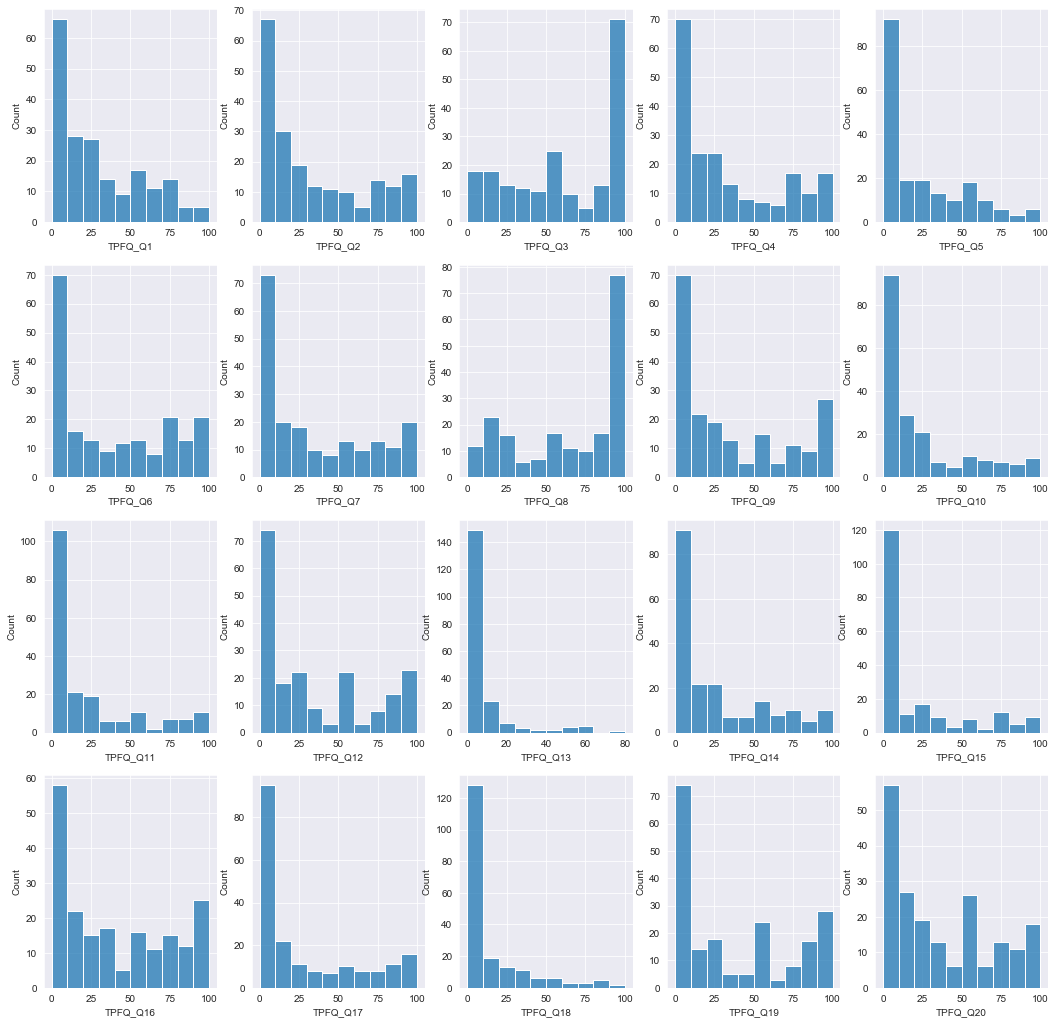

In [30]:
fig, ax = plt.subplots(4,5,figsize=(18,18))

num_columns = tpfq.shape[1]

for row in range(0,4):
    for col in range(0,5):
        cur_feature = tpfq.columns[5*row+col]
        sns.histplot(tpfq[cur_feature].astype(int), bins=10, ax=ax[row][col])

In [31]:
# group by subscore (4 subscales)

tpfq_c_idx = [1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1]
tpfq_e_idx = [0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0]
tpfq_h_idx = [0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0]
tpfq_s_idx = [0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0]

tpfq_c = tpfq.loc[:,[i==1 for i in tpfq_c_idx]]
tpfq_e = tpfq.loc[:,[i==1 for i in tpfq_e_idx]]
tpfq_h = tpfq.loc[:,[i==1 for i in tpfq_h_idx]]
tpfq_s = tpfq.loc[:,[i==1 for i in tpfq_s_idx]]

In [32]:
tpfq_c_val = tpfq_c.values.reshape(-1)
tpfq_e_val = tpfq_e.values.reshape(-1)
tpfq_h_val = tpfq_h.values.reshape(-1)
tpfq_s_val = tpfq_s.values.reshape(-1)

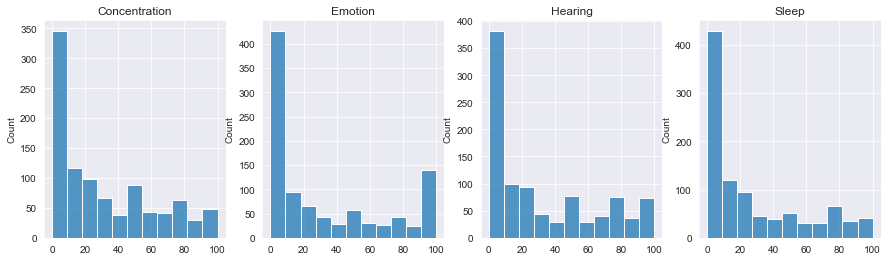

In [33]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
sns.histplot(tpfq_c_val.astype(int), ax=ax1)
sns.histplot(tpfq_e_val.astype(int), ax=ax2)
sns.histplot(tpfq_h_val.astype(int), ax=ax3)
sns.histplot(tpfq_s_val.astype(int), ax=ax4)
ax1.title.set_text('Concentration')
ax2.title.set_text('Emotion')
ax3.title.set_text('Hearing')
ax4.title.set_text('Sleep')
plt.show()

## BAI

Scale: 0-63

In [34]:
bai = data['BAI_Total(63)']

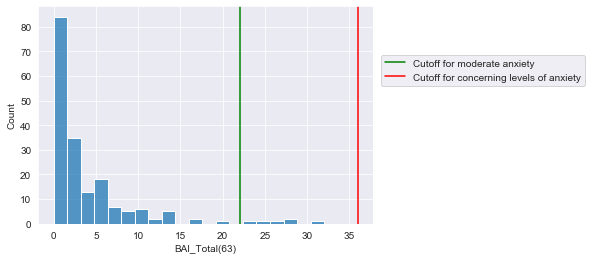

In [35]:
sns.histplot(bai, bins=20)
plt.axvline(x=22, color='green', label='Cutoff for moderate anxiety')
plt.axvline(x=36, color='red', label='Cutoff for concerning levels of anxiety')
plt.legend(loc='upper left',bbox_to_anchor=(1.01, 0.8))
plt.show()

In [36]:
print(np.sum(bai>=22))
print(np.sum(bai<22))

6
178


## BDI

Scale: 0-63

In [37]:
bdi = data['BDI_Total(63)']

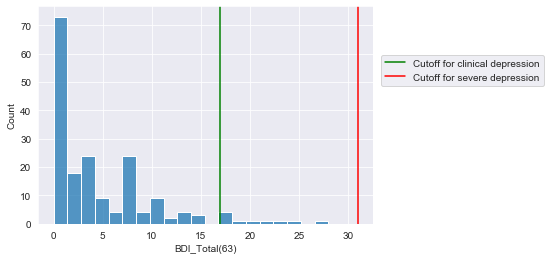

In [38]:
sns.histplot(bdi, bins=20)
plt.axvline(x=17, color='green', label='Cutoff for clinical depression')
plt.axvline(x=31, color='red', label='Cutoff for severe depression')
plt.legend(loc='upper left',bbox_to_anchor=(1.01, 0.8))
plt.show()

In [39]:
print(np.sum(bdi>=17))
print(np.sum(bdi<17))

10
174


In [40]:
# distribution for THI, TFI and TPFQ total scores

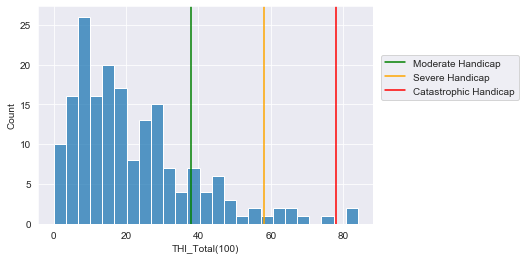

In [42]:
thi = data['THI_Total(100)']
sns.histplot(thi, bins=25)
plt.axvline(x=38, color='green', label='Moderate Handicap')
plt.axvline(x=58, color='orange', label='Severe Handicap')
plt.axvline(x=78, color='red', label='Catastrophic Handicap')
plt.legend(loc='upper left',bbox_to_anchor=(1.01, 0.8))
plt.show()

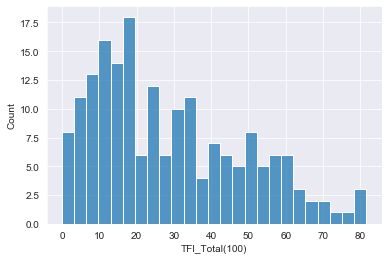

In [43]:
tfi = data['TFI_Total(100)']
sns.histplot(tfi, bins=25)
# plt.axvline(x=38, color='green', label='Moderate')
# plt.axvline(x=58, color='orange', label='Severe')
# plt.axvline(x=78, color='red', label='Catastrophic')
# plt.legend(loc='upper left',bbox_to_anchor=(1.01, 0.8))
plt.show()

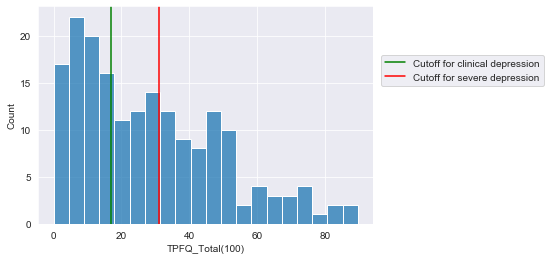

In [44]:
tpfq = data['TPFQ_Total(100)']
sns.histplot(tpfq, bins=20)
plt.axvline(x=17, color='green', label='Cutoff for clinical depression')
plt.axvline(x=31, color='red', label='Cutoff for severe depression')
plt.legend(loc='upper left',bbox_to_anchor=(1.01, 0.8))
plt.show()